# El problema de Boussinesq: cargas puntuales en medios seminfinitos

In [1]:
from sympy import init_printing, latex, symbols, pi, sqrt, log, simplify, diff, Eq, integrate, oo, solve, Matrix, factor

# Para imprimir bonito
init_printing()
from IPython.display import Math                 
def imprimir (texto1, variable, texto2=""):
    return Math(texto1 +  rf'{latex(variable)}' + texto2)

In [2]:
# el radio r solo puede tomar valores positivos
r = symbols('r', positive=True) # r > 0

# el medio semiinfinito se encuentra para z<0, por lo que a<0
a = symbols('a', negative=True)

t = symbols('theta')
A, B, R, z, P, nu, E= symbols('A, B, R, z, P, nu, E')

In [3]:
# la función de tensión de Love solo depende de r y z
R = sqrt(r**2 + z**2)
phi = B*R + A*z*log(R + z) # log(R+z) es el logaritmo natural de R+z

Se define el laplaciano en el caso axisimétrico:

In [4]:
lapl = lambda f : (1/r)*diff(r*diff(f,r),r) + diff(f,z,2)

In [5]:
# se calcula el biarmónico de la función de tensión de Love
bphi = simplify(lapl(lapl(phi)))

In [6]:
# se verifica si el biarmónico se satisface
if bphi == 0:
    print("El biarmónico se satisface")
else:
    raise Exception("El biarmónico NO se satisface")

El biarmónico se satisface


Se definen los esfuerzos por medio de la función de tensión de Love:

In [7]:
sr  = simplify(diff(    nu*lapl(phi) -       diff(phi,r,2), z))
st  = simplify(diff(    nu*lapl(phi) - (1/r)*diff(phi,r),   z))
sz  = simplify(diff((2-nu)*lapl(phi) -       diff(phi,z,2), z))
trz = simplify(diff((1-nu)*lapl(phi) -       diff(phi,z,2), r))

Se definen los desplazamientos empleando la función de tensión de Love:

In [8]:
ur = simplify(-((1+nu)/E)*diff(phi,r,1,z,1))
w  = simplify( ((1+nu)/E)*(2*(1-nu)*lapl(phi) - diff(phi,z,2)))

## Verificación de las condiciones de frontera

$\sigma_z$ en el plano $z = 0$ vale cero para $r>0$:

In [9]:
sz.subs(z, 0) == 0

True

$\tau_{rz}$ en el plano $z = 0$ vale cero para $r>0$:

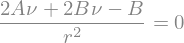

In [10]:
eq1 = simplify(Eq(trz.subs(z, 0), 0))
eq1

 Sobre cualquier plano $z=a$, la integral de los sz vale +P

In [11]:
# eq2 = Eq(integrate(sz.subs(z,a) * 2*pi*r, (r, 0, oo)) - P, 0)

SYMPY no es capaz de resolver la línea anterior. Sin embargo, MAXIMA si lo hace y su resultado es:

In [12]:
eq2 = Eq(2*pi*(-2*(A + B)*nu + 2*B + A) - P, 0)

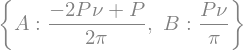

In [13]:
const_AB = solve([eq1, eq2], [A, B])
const_AB

In [14]:
# Se reemplazan las constantes A y B en los esfuerzos y desplazamientos
sol1 = [sr, st, sz, trz, ur, w]

sol1 = [expr.subs(const_AB) for expr in sol1]

Estos son los esfuerzos y desplazamientos como usualmente aparecen en la literatura:

In [15]:
srL  = (P/(2*pi*R**2))*(-3*r**2*z/R**3 + (1-2*nu)*R/(R+z))
stL  = ((1-2*nu)*P/(2*pi*R**2))*(z/R - R/(R+z))
szL  = -3*P*z**3/(2*pi*R**5)
trzL = -3*P*r*z**2/(2*pi*R**5)
urL  = ((1+nu)*P/(2*pi*E*R))*(r*z/R**2 - (1-2*nu)*r/(R+z))
wL   = ((1+nu)*P/(2*pi*E*R))*(2*(1-nu) + z**2/R**2)

sol2 = [srL, stL, szL, trzL, urL, wL]

Esta última línea imprime `[0, 0, 0, 0, 0, 0]`, lo cual indica que obtuvimos los mismos resultados reportados en la literatura:

In [16]:
simplify(Matrix(sol1) - Matrix(sol2)).T